In [1]:
%load_ext autoreload
%autoreload 2
from fun import *
os.environ['QT_QPA_PLATFORM']='offscreen'

### AKAP12 

In [2]:
ref = 'Homo_sapiens_akap12'

In [3]:
# Multiple Sequence Alignment using MUSCLE
seq_filename = 'fasta_files/akap12_seq.fa'
msa_filename = 'fasta_files/msa/akap12_seq_align.fa'
# subprocess.call(["muscle","-align", seq_filename, "--output", msa_filename], 
#                 stdout=subprocess.DEVNULL,
#                 stderr=subprocess.STDOUT)

In [4]:
# Parse msa and original sequences
akap12_seqs = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open(seq_filename),'fasta')}
akap12_msa_seqs = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open(msa_filename),'fasta')}
host_guest_dict = species_host_to_guest_map_dic()
nwk_direct = 'nwk_trees/model_species.nwk'

### Binding partners:
#### [Qasim et al. JAHA (2020)](https://www.ahajournals.org/doi/10.1161/JAHA.120.016615)

#### 1. Calmodulin (CaM) - WSK domain 

##### 1.1 I WSK instance

In [5]:
base_string_wski = 'EGVTPWASFKKMVTPKKRVRRPSESDKE'
compiled_regex = re.compile('(-)*'.join(list(base_string_wski)))
start, end = compiled_regex.search(akap12_msa_seqs[ref]).span()

Duplicated entry [Danio_rerio] was renamed to [1_Danio_rerio]


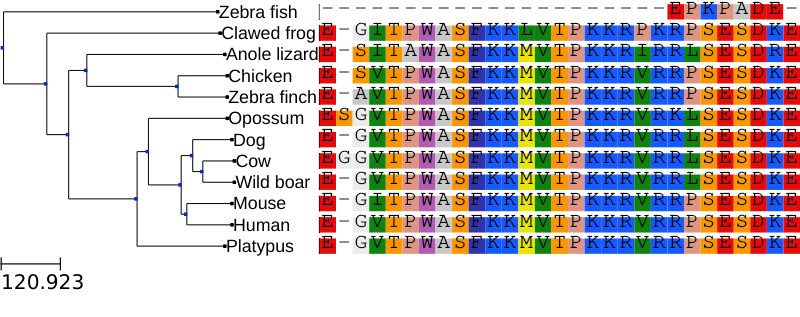

In [6]:
filename = 'fasta_files/binding_regions/AKAP12_WSK_i.fa'
regions_dict, aln = seq_domain_alignment(akap12_msa_seqs, akap12_seqs, start, end, 'WSK', filename)
# alv.view(aln)

t = render_msa_phylo(nwk_direct, read_fasta(filename), host_guest_dict)
t.render("%%inline", w = 800)

##### 1.2 II WSK instance

Duplicated entry [Danio_rerio] was renamed to [1_Danio_rerio]


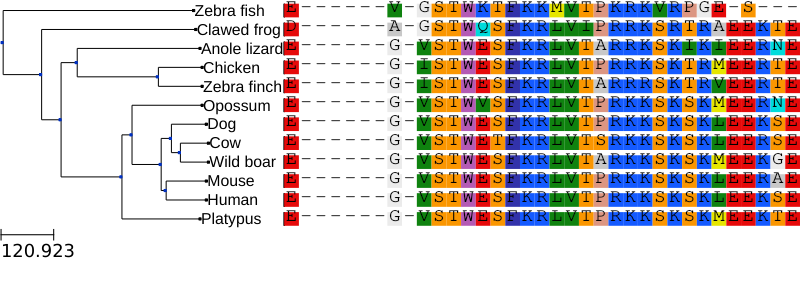

In [7]:
base_string_wskii = 'EGVSTWESFKRLVTPRKKSKSKLEEKSE'
compiled_regex = re.compile('(-)*'.join(list(base_string_wskii)))
start, end = compiled_regex.search(akap12_msa_seqs[ref]).span()

filename = 'fasta_files/binding_regions/AKAP12_WSK_ii.fa'
regions_dict, aln = seq_domain_alignment(akap12_msa_seqs, akap12_seqs, start, end, 'WSK', filename)
# alv.view(aln)

t = render_msa_phylo(nwk_direct, read_fasta(filename), host_guest_dict)
t.render("%%inline", w = 800)

##### 1.3 III WSK instance

Duplicated entry [Danio_rerio] was renamed to [1_Danio_rerio]


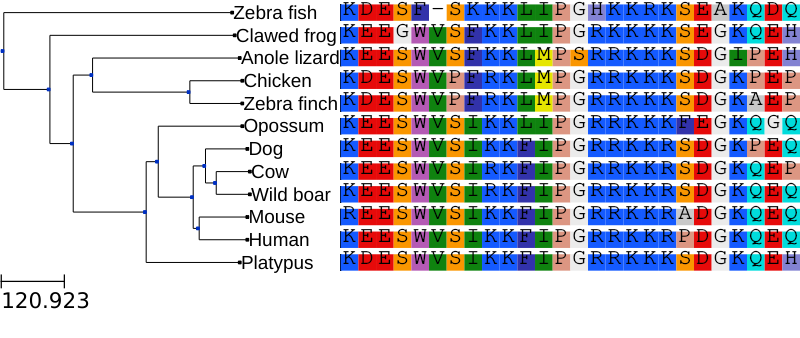

In [8]:
base_string_wskiii = 'KEESWVSIKKFIPGRRKKRPDGKQEQ'
compiled_regex = re.compile('(-)*'.join(list(base_string_wskiii)))
start, end = compiled_regex.search(akap12_msa_seqs[ref]).span()

filename = 'fasta_files/binding_regions/AKAP12_WSK_iii.fa'
regions_dict, aln = seq_domain_alignment(akap12_msa_seqs, akap12_seqs, start, end, 'WSK', filename)
# alv.view(aln)

t = render_msa_phylo(nwk_direct, read_fasta(filename), host_guest_dict)
t.render("%%inline", w = 800)

#### 2. PKA 

In [9]:
base_string_pka = 'NGILELETKSSKLVQNIIQTAVD'
compiled_regex = re.compile('(-)*'.join(list(base_string_pka)))
start, end = compiled_regex.search(akap12_msa_seqs[ref]).span()

filename = 'fasta_files/binding_regions/AKAP12_PKA.fa'
regions_dict, aln = seq_domain_alignment(akap12_msa_seqs, akap12_seqs, start, end,
                                         'PKA', filename, regions_dict)
# alv.view(aln)

Duplicated entry [Danio_rerio] was renamed to [1_Danio_rerio]


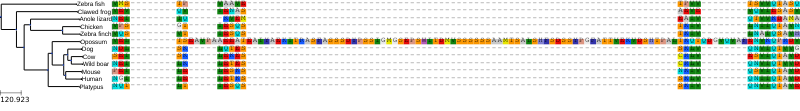

In [10]:
t = render_msa_phylo(nwk_direct, read_fasta(filename), host_guest_dict)
t.render("%%inline", w = 800)

#### 3. PKC binding

In [11]:
# base_string_pkc = 'KASMLCFKRRKKAAKALKPKAG'
# compiled_regex = re.compile('(-)*'.join(list(base_string_pkc)))
# start, end = compiled_regex.search(akap12_msa_seqs[ref]).span()

# filename = 'fasta_files/binding_regions/AKAP12_PKC.fa'
# regions_dict, aln = seq_domain_alignment(akap12_msa_seqs, akap12_seqs, start, end,
#                                          'PKC', filename, regions_dict)
# # alv.view(aln)

# t = render_msa_phylo(nwk_direct, read_fasta(filename), host_guest_dict)
# t.render("%%inline", w = 700)

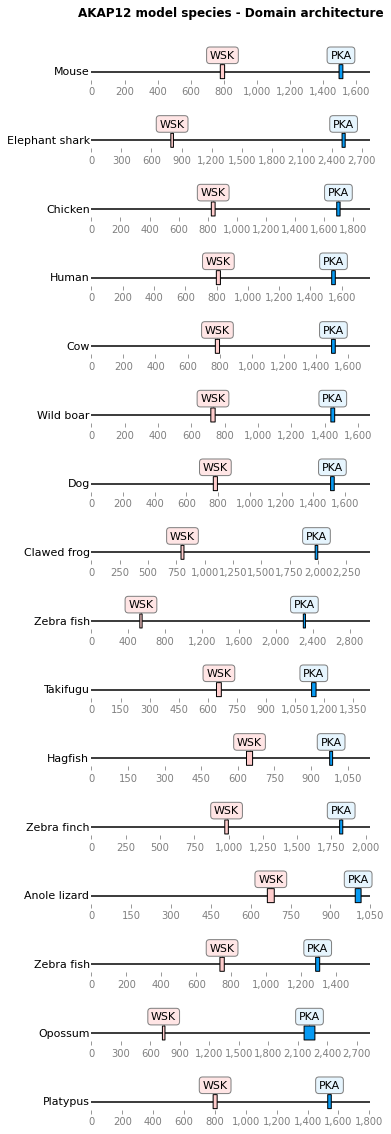

In [12]:
title = 'AKAP12 model species - Domain architecture'
visualize_structure(host_guest_dict, colors(), regions_dict, title, akap12_seqs)

In [ ]:
# #Notes:
# Is PKC in frog? what changed in the allignment from previous results?